In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score,f1_score, accuracy_score, precision_score, recall_score
import numpy as np
#plot the depth
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import balanced_accuracy_score,f1_score,precision_score, recall_score



df = pd.read_csv('data/breast_cancer.csv', delimiter=',', quotechar='"')
features = df.loc[:,"radius_mean":"fractal_dimension_worst"]
labels = df["diagnosis"]
#1 for malignant 0 for benign
binary_labels = [1 if x == 'M' else 0 for x in labels]


X_train, X_test, y_train, y_test = train_test_split(features, binary_labels, test_size=0.25)


In [3]:
#change kernels
from sklearn import svm
kernels = ['linear', 'poly']


train_prec = []
test_prec = []

train_recall = []
test_recall = []


cross_val_recall_avg =[]
cross_val_recall_std = []


portions = range(10, 101, 10)
for i in kernels:
    ker_train_prec = []
    ker_test_prec = []

    ker_train_recall = []
    ker_test_recall = []

    
    ker_cross_val_recall_avg =[]
    ker_cross_val_recall_std = []
    
    for count, o in enumerate(portions):
        end = int(len(X_train)* o/100.0)

        print ('portions=' + str(o) + str(i))
        clf = svm.SVC(C=10, gamma='auto', kernel=i)
        scores_recall =cross_validate(clf, X_train[:end], y_train[:end], cv=3, scoring='recall',return_train_score=True,return_estimator=True)

        ind= np.argmax(scores_recall['test_score'])

        ker_cross_val_recall_std.append(np.std(scores_recall['test_score']))
        ker_cross_val_recall_avg.append(np.average(scores_recall['test_score']))

        est = scores_recall['estimator'][ind]

        ker_train_prec.append(precision_score(y_train[:end], est.predict(X_train[:end])))
        ker_test_prec.append(precision_score(y_test, est.predict(X_test)))

        ker_train_recall.append(recall_score(y_train[:end], est.predict(X_train[:end])))
        ker_test_recall.append(recall_score(y_test, est.predict(X_test)))

        print(confusion_matrix(y_test, est.predict(X_test)))
    train_prec.append(ker_train_prec)
    test_prec.append(ker_test_prec)
    test_recall.append(ker_test_recall)
    train_recall.append(ker_train_recall)
    cross_val_recall_avg.append(ker_cross_val_recall_avg)
    cross_val_recall_std.append(ker_cross_val_recall_std)

portions=10linear
[[87  7]
 [ 1 48]]
portions=20linear
[[88  6]
 [ 4 45]]
portions=30linear
[[86  8]
 [ 4 45]]
portions=40linear
[[88  6]
 [ 4 45]]
portions=50linear
[[89  5]
 [ 5 44]]
portions=60linear
[[88  6]
 [ 3 46]]
portions=70linear
[[89  5]
 [ 3 46]]
portions=80linear
[[91  3]
 [ 5 44]]
portions=90linear
[[89  5]
 [ 4 45]]
portions=100linear
[[89  5]
 [ 4 45]]
portions=10poly
[[89  5]
 [ 5 44]]
portions=20poly
[[88  6]
 [ 8 41]]
portions=30poly
[[82 12]
 [10 39]]
portions=40poly
[[90  4]
 [ 8 41]]
portions=50poly
[[89  5]
 [ 2 47]]
portions=60poly
[[90  4]
 [ 6 43]]
portions=70poly
[[87  7]
 [ 7 42]]
portions=80poly
[[88  6]
 [ 6 43]]
portions=90poly
[[89  5]
 [ 5 44]]
portions=100poly
[[87  7]
 [ 4 45]]


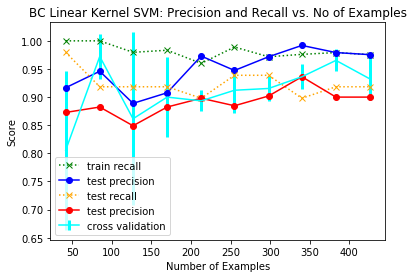

In [22]:
#depth tree graph 
import matplotlib.pyplot as plt
plt.figure()
plt.title('BC Linear Kernel SVM: Precision and Recall vs. No of Examples')
#plt.ylim((0.9,1))
ps=[int(len(X_train)* p/100.0) for p in portions]

ps = [int(len(X_train)* p/100.0) for p in portions]
plt.plot(ps, list(train_recall[0]), 'x', color='green', label='train recall', linestyle=':')
plt.plot(ps, list(train_prec[0]), 'o-', color='blue', label='test precision')

plt.plot(ps, list(test_recall[0]),'x',color='orange',  label='test recall',linestyle=':')
plt.plot(ps, list(test_prec[0]),'o-',  color='red',  label='test precision')

plt.errorbar(ps, list(cross_val_recall_avg[0]),yerr=list(cross_val_recall_std[0]), elinewidth=3,linestyle='-', label='cross validation', color='cyan')

plt.xlabel("Number of Examples")
plt.ylabel("Score")

plt.savefig('plots/depth_precision_recall_breastCancer')
plt.legend()
plt.show()

Text(0, 0.5, 'Score')

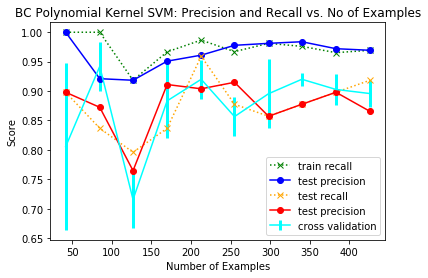

In [20]:
import matplotlib.pyplot as plt
plt.figure()
ps = [int(len(X_train)* p/100.0) for p in portions]
plt.title('BC Polynomial Kernel SVM: Precision and Recall vs. No of Examples')
plt.plot(ps, list(train_recall[1]), 'x', color='green', label='train recall', linestyle=':')
plt.plot(ps, list(train_prec[1]), 'o-', color='blue', label='test precision')

plt.plot(ps, list(test_recall[1]),'x',color='orange',  label='test recall',linestyle=':')
plt.plot(ps, list(test_prec[1]),'o-',  color='red',  label='test precision')

plt.errorbar(ps, list(cross_val_recall_avg[1]),yerr=list(cross_val_recall_std[1]), elinewidth=3,linestyle='-', label='cross validation', color='cyan')

plt.legend()

plt.xlabel("Number of Examples")
plt.ylabel("Score")

In [17]:
test_recall[0]

[0.9795918367346939,
 0.9183673469387755,
 0.9183673469387755,
 0.9183673469387755,
 0.8979591836734694,
 0.9387755102040817,
 0.9387755102040817,
 0.8979591836734694,
 0.9183673469387755,
 0.9183673469387755]

In [18]:
test_recall[1]

[0.8979591836734694,
 0.8367346938775511,
 0.7959183673469388,
 0.8367346938775511,
 0.9591836734693877,
 0.8775510204081632,
 0.8571428571428571,
 0.8775510204081632,
 0.8979591836734694,
 0.9183673469387755]

In [23]:
test_prec[0]

[0.8727272727272727,
 0.8823529411764706,
 0.8490566037735849,
 0.8823529411764706,
 0.8979591836734694,
 0.8846153846153846,
 0.9019607843137255,
 0.9361702127659575,
 0.9,
 0.9]

In [24]:
test_prec[1]

[0.8979591836734694,
 0.8723404255319149,
 0.7647058823529411,
 0.9111111111111111,
 0.9038461538461539,
 0.9148936170212766,
 0.8571428571428571,
 0.8775510204081632,
 0.8979591836734694,
 0.8653846153846154]

In [25]:
cross_val_recall_std[0]

[0.14163943093313294,
 0.039283710065919325,
 0.15377826787584714,
 0.07071067811865477,
 0.018856180831641284,
 0.04131358862629048,
 0.022045149900528752,
 0.022179149186840864,
 0.019641855032959635,
 0.03819764371084602]

In [26]:
cross_val_recall_std[1]

[0.14163943093313294,
 0.041185622298737616,
 0.04852693596378266,
 0.062360956446232324,
 0.032659863237109024,
 0.032947627797222614,
 0.05905221768139056,
 0.010836651182561692,
 0.025983731852596812,
 0.022935749700825684]

In [4]:
#changing c
#change kernels
from sklearn import svm

C = [0.001,0.01, 0.1, 1, 10, 100]
clf = svm.SVC(C=1.0, degree=3, gamma='auto', kernel='rbf')

train_prec = []
test_prec = []

train_recall = []
test_recall = []


cross_val_recall_avg =[]
cross_val_recall_std = []


estimators = []
    
for i, o in enumerate(C):
    print ('C=' + str(o))
    clf = svm.SVC(C=o, gamma='auto', kernel='rbf')
    scores_recall =cross_validate(clf, X_train, y_train, cv=3, scoring='recall',return_train_score=True,return_estimator=True)

    ind= np.argmax(scores_recall['test_score'])
    estimators.append(scores_recall['estimator'][ind])

    cross_val_recall_std.append(np.std(scores_recall['test_score']))
    cross_val_recall_avg.append(np.average(scores_recall['test_score']))

    est = scores_recall['estimator'][ind]

    train_prec.append(precision_score(y_train, est.predict(X_train)))
    test_prec.append(precision_score(y_test, est.predict(X_test)))

    train_recall.append(recall_score(y_train, est.predict(X_train)))
    test_recall.append(recall_score(y_test, est.predict(X_test)))

    #clf.fit(X_train, y_train)



    print(confusion_matrix(y_test, est.predict(X_test)))

C=0.001


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[[97  0]
 [46  0]]
C=0.01


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[[97  0]
 [46  0]]
C=0.1


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[[97  0]
 [46  0]]
C=1


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[[97  0]
 [46  0]]
C=10
[[97  0]
 [46  0]]
C=100
[[97  0]
 [46  0]]


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


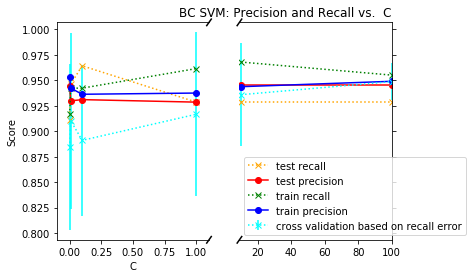

In [76]:
#plot C
from matplotlib import ticker
f,(ax,ax2) = plt.subplots(1,2,sharey=True, facecolor='w')
x1 = [0.001, 0.01, 0.1, 1]
x2 = [10,100]

#y = test_recall[:4]

# plot the same data on both axes

ax.plot(x1, test_recall[:4],  'x', color='orange', label='test recall', linestyle=':')
ax2.plot(x2, test_recall[4:], 'x', color='orange', label='test recall', linestyle=':')

ax.plot(x1, test_prec[:4],  'o-',  color='red', label='test precision')
ax2.plot(x2, test_prec[4:], 'o-',  color='red', label='test precision')

ax.plot(x1, train_recall[:4], 'x', color='green', label='train recall', linestyle=':')
ax2.plot(x2, train_recall[4:], 'x', color='green', label='train recall', linestyle=':')

ax.plot(x1, train_prec[:4], 'o-', color='blue', label='train precision')
ax2.plot(x2, train_prec[4:], 'o-', color='blue', label='train precision')

ax.set_xlim(-0.1,1.1)
ax2.set_xlim(9,100)

ax.errorbar(x1, cross_val_recall_avg[:4],yerr=list(cross_val_recall_std[:4]), linestyle=':',fmt='x',color='cyan', label='cross validation based on recall error')
ax2.errorbar(x2, cross_val_recall_avg[4:],yerr=list(cross_val_recall_std[4:]), linestyle=':',fmt='x',color='cyan', label='cross validation based on recall error')



# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax.tick_params(labelright='off')
ax2.yaxis.tick_right()



# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0,0), (0,1),
# (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.
ax2.set_title('BC SVM: Precision and Recall vs.  C', loc='right')
ax.set_xlabel("C")
ax.set_ylabel("Score")
d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'
plt.legend()
plt.show()

In [77]:
test_recall

[0.9107142857142857,
 0.9464285714285714,
 0.9642857142857143,
 0.9285714285714286,
 0.9285714285714286,
 0.9285714285714286]

In [78]:
train_recall

[0.9166666666666666,
 0.9423076923076923,
 0.9423076923076923,
 0.9615384615384616,
 0.967948717948718,
 0.9551282051282052]

In [79]:
cross_val_recall_avg

[0.8846153846153847,
 0.9102564102564102,
 0.8910256410256411,
 0.9166666666666666,
 0.935897435897436,
 0.9487179487179488]

In [ ]:
cross_val_recall_std

In [ ]:
#